# P612: Product Recommendation System

**Group Members - Group 5**

Lokhande Shraddha Rohidas

Supriya Gurushantayya mathpati

Jayshri Bhaskar Kor

Prasanna M Kulkarni

Hema Sai Reddy Anam

Putta Sathwik

Yash Dilip Sonone

#

## Data Exploration

**Import Required Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving rating_short.csv to rating_short (1).csv


In [ ]:
# Load the dataset
df = pd.read_csv('rating_short.csv')

# Display first 5 rows
df.head()


,userid,productid,rating,date
0,A1Z3YJF1S8Z1M3,B000M9ISQ2,5.0,1199750400
1,ALDXDYEGKB27G,B002L6HE9G,4.0,1331337600
2,A15LOGO6NBSI6B,B007MXGG5Q,5.0,1358640000
3,A23LX12CA3G4FG,B008HOEDYU,1.0,1385337600
4,A3TV7QFYXAG130,B0069R7TAM,5.0,1402963200


In [ ]:
# Basic inspection
print("Dataset Shape:", df.shape)
print("\nColumn Names:")
print(df.columns)

Dataset Shape: (78245, 4)

Column Names:
Index(['userid', 'productid', 'rating', 'date'], dtype='object')


In [ ]:
# Check column names and data types
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78245 entries, 0 to 78244
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   userid     78245 non-null  object 
 1   productid  78245 non-null  object 
 2   rating     78245 non-null  float64
 3   date       78245 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 2.4+ MB


#### Dataset Overview

The dataset contains **78,245 user–product interactions** used for building a recommendation system.

##### 🔹 Columns
- **userid**: Unique user identifier  
- **productid**: Unique product identifier  
- **rating**: User rating (1–5 scale)  
- **date**: Timestamp of rating

##### 🔹 Key Observations
- Each record represents one user rating one product.
- The dataset is **highly sparse**, as users rate only a few products.
- This makes it suitable for **collaborative filtering, SVD, and clustering-based recommendation techniques**.


#

## Data Cleaning

**Handling Irrelevant Column**

Removing Irrelevant Column

The **date (timestamp)** column does not directly impact user preferences or product recommendations.  
Since this project focuses on user–product ratings, the timestamp feature is removed to keep the dataset simple and relevant for analysis.


In [ ]:
# Remove the irrelevant 'date' column
df = df.drop(columns=['date'])

**Handling Missing Values and Duplicates**

In [ ]:
# Check for missing values
print("Missing values:\n", df.isnull().sum())

Missing values:
 userid       0
productid    0
rating       0
dtype: int64


In [ ]:
# Check for duplicate records
print("\nDuplicate rows:", df.duplicated().sum())


Duplicate rows: 0


In [ ]:
# Verify updated dataset
df.head()

,userid,productid,rating
0,A1Z3YJF1S8Z1M3,B000M9ISQ2,5.0
1,ALDXDYEGKB27G,B002L6HE9G,4.0
2,A15LOGO6NBSI6B,B007MXGG5Q,5.0
3,A23LX12CA3G4FG,B008HOEDYU,1.0
4,A3TV7QFYXAG130,B0069R7TAM,5.0


#### Data Cleaning Summary

- No missing values were found in the dataset.
- No duplicate records were detected.
- The **date** column was removed as it is not required for rating-based recommendations.

##### Final Dataset
- Records: **78,245**
- Columns: **userid, productid, rating**

The cleaned dataset is consistent and noise-free

#

## EDA

**unique users and products**

In [ ]:
# Number of unique users and products
num_users = df['userid'].nunique()
num_products = df['productid'].nunique()

print("Number of unique users:", num_users)
print("Number of unique products:", num_products)


Number of unique users: 76430
Number of unique products: 40228


In [ ]:
# Average number of ratings per user and per product
avg_ratings_per_user = df.groupby('userid')['rating'].count().mean()
avg_ratings_per_product = df.groupby('productid')['rating'].count().mean()

print("Average ratings per user:", round(avg_ratings_per_user, 2))
print("Average ratings per product:", round(avg_ratings_per_product, 2))


Average ratings per user: 1.02
Average ratings per product: 1.95


#### Interaction Analysis

- **Unique Users:** 76,430  
- **Unique Products:** 40,228  
- **Total Interactions:** 78,245  

##### 🔹 Key Insights
- On average, each user has rated **~1 product**.
- Each product has received **~2 ratings** on average.
- This confirms that the dataset is **extremely sparse**.

#

**Rating Distribution**

In [ ]:
# Rating distribution
rating_counts = df['rating'].value_counts().sort_index()
rating_counts


,count
rating,
1.0,9128
2.0,4592
3.0,6287
4.0,14878
5.0,43360


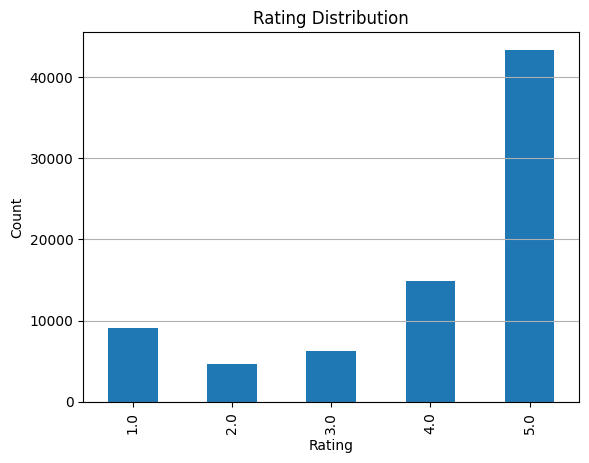

In [ ]:
# Rating distribution visualization
plt.figure()
rating_counts.plot(kind='bar')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Rating Distribution')
plt.grid(axis="y")
plt.show()


#### Rating Distribution Insights

- Higher ratings (**4 and 5**) dominate the dataset.
- Rating **5** is the most frequent, indicating generally positive user feedback.
- Lower ratings (**1 and 2**) are comparatively fewer.

#

**Most Active Users & Products**

In [ ]:
# Most active users (users with highest number of ratings)
top_users = df['userid'].value_counts().head(10)
top_users


,count
userid,
A3LGT6UZL99IW1,8
A1ODOGXEYECQQ8,8
ARBKYIVNYWK3C,7
ADLVFFE4VBT8,7
A2AY4YUOX2N1BQ,6
A15QYHQH80W30L,6
A27TN8D0CZ8LUY,6
AVPNQUVZWMDSX,6
A2J8T58Z4X15IO,5


**Most Rated Products**

In [ ]:
# Most rated products (products with highest number of ratings)
top_products = df['productid'].value_counts().head(10)
top_products


,count
productid,
B0074BW614,201
B00DR0PDNE,179
B007WTAJTO,147
B006GWO5WK,126
B003ELYQGG,126
B0019EHU8G,123
B00622AG6S,113
B008OHNZI0,112
B007R5YDYA,108


- The most active users have contributed **5–8 ratings**, while the majority of users have rated only **one product**.

- A small set of products received a relatively higher number of ratings (around **100–200**), whereas most products have very limited interactions.

#

**Sparsity Analysis**

In [ ]:
# Sparsity calculation of user-item interaction matrix
num_users = df['userid'].nunique()
num_products = df['productid'].nunique()
num_interactions = len(df)

# Sparsity calculation
sparsity = 1 - (num_interactions / (num_users * num_products))

print("\nObserved interactions:", num_interactions)
print("\nSparsity of the dataset:", round(sparsity, 6))
print("\nSparsity of the user-item matrix:", round(sparsity, 6))
print("\nSparsity percentage:", round(sparsity * 100, 4), "%")


Observed interactions: 78245

Sparsity of the dataset: 0.999975

Sparsity of the user-item matrix: 0.999975

Sparsity percentage: 99.9975 %


#### Sparsity Analysis

- Total possible user–product interactions: **~3.07 billion**
- Observed interactions: **78,245**
- Dataset sparsity: **99.9975%**

The dataset is **extremely sparse**, with only a tiny fraction of possible interactions observed.  
This confirms that:
- Direct clustering on the raw user–item matrix is ineffective.
- Dimensionality reduction and latent feature learning are necessary


#

**Heatmap**

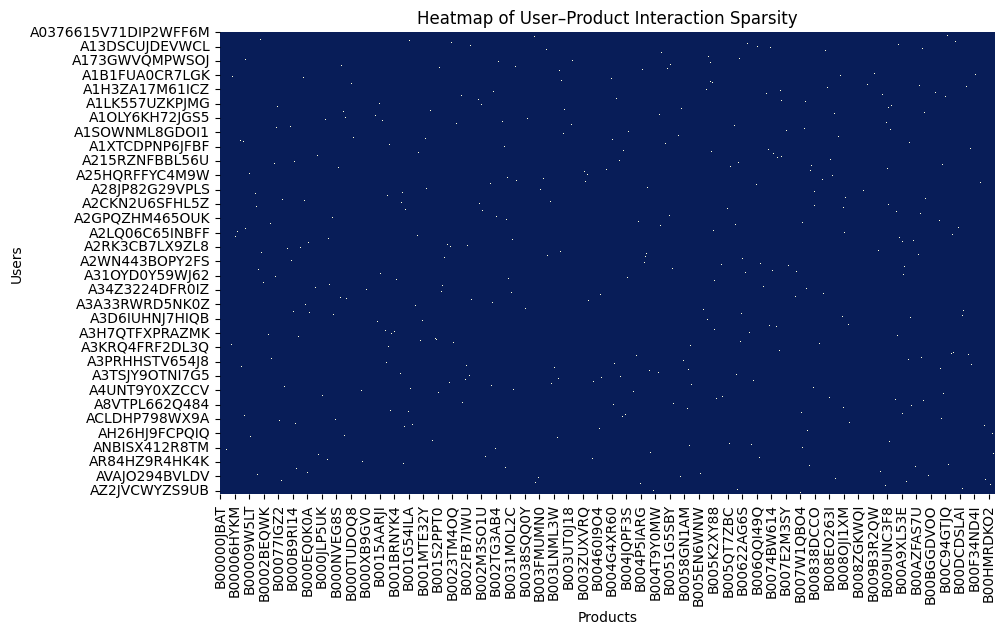

In [ ]:
# Heatmap to visualize sparsity using sampled data
sample_df = df.sample(1000, random_state=42)

user_item_matrix = sample_df.pivot_table(
    index='userid',
    columns='productid',
    values='rating'
)

plt.figure(figsize=(10, 6))
sns.heatmap(
    user_item_matrix.isnull(),
    cmap="YlGnBu",   # better contrast
    cbar=False
)
plt.title('Heatmap of User–Product Interaction Sparsity')
plt.xlabel('Products')
plt.ylabel('Users')
plt.show()


**Heatmap Interpretation**

The heatmap visualizes the **sparsity of user–product interactions** using a sampled subset of the data.  
Dark regions represent **missing interactions**, while lighter regions indicate **existing ratings**.  
The dominance of dark areas confirms that the dataset is **highly sparse**, which is a common characteristic of large-scale recommendation systems.


#

**Data Filtering**

In [ ]:
# Filtering to reduce sparsity and improve model stability

# Keep users with at least 2 ratings
active_users = df['userid'].value_counts()
active_users = active_users[active_users >= 2].index

# Keep products with at least 5 ratings
popular_products = df['productid'].value_counts()
popular_products = popular_products[popular_products >= 5].index

# Apply filtering
filtered_df = df[
    (df['userid'].isin(active_users)) &
    (df['productid'].isin(popular_products))
]

print("Original dataset shape:", df.shape)
print("Filtered dataset shape:", filtered_df.shape)


Original dataset shape: (78245, 3)
Filtered dataset shape: (1020, 3)


#

**User–Item Matrix creation**

In [ ]:
# Create user-item matrix from filtered data
user_item_matrix = filtered_df.pivot_table(
    index='userid',
    columns='productid',
    values='rating',
    fill_value=0
)

user_item_matrix.shape


(824, 743)

The user–item matrix was created with **824 users** and **743 products**.  
Each row represents a user, each column represents a product, and the values indicate ratings.

Most entries in the matrix are **0**, showing that users interact with only a few products.  
This confirms that the data remains **highly sparse**, even after filtering.

#

## Model Building

#### **Model 1 – Item-Based Collaborative Filtering**

Item-based Collaborative Filtering recommends products by identifying items that are similar based on user rating patterns.  
It is more stable than user-based methods and is widely used in real-world recommender systems.


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd

# Compute item-item similarity
item_similarity = cosine_similarity(user_item_matrix.T)

item_similarity_df = pd.DataFrame(
    item_similarity,
    index=user_item_matrix.columns,
    columns=user_item_matrix.columns
)

item_similarity_df.head()


productid,0972683275,9575871979,B00001P4XA,B00004SABB,B00004T8R2,B00004THCZ,B00004WCIC,B00005ATMI,B00005N6KG,B00005T3H5,...,B00EN27TCI,B00EUY59Z8,B00EVVGAC6,B00EZ9XGGC,B00F0DD0I6,B00FD5L646,B00FNPD1OY,B00G2TK76A,B00GRACUXM,B00INNP5VU
productid,,,,,,,,,,,,,,,,,,,,,
0972683275,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9575871979,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
B00001P4XA,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
B00004SABB,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
B00004T8R2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Item–item cosine similarity was computed using the user–item interaction matrix.  


Due to the highly sparse nature of the dataset, most item pairs show low similarity values, which is expected in large-scale recommender systems.


#### Item–Item Similarity Matrix

- Diagonal values of 1.0 indicate perfect similarity of a product with itself.
- Off-diagonal values are mostly 0.0 due to the sparse user–item interaction matrix.
- Many products do not share common users, which leads to low cosine similarity.
- This behavior is expected in large-scale e-commerce recommendation systems.
- Item-based collaborative filtering provides a baseline similarity approach.
- Matrix factorization is applied next to capture latent item relationships.


#

#### **Model 2 – SVD Matrix Factorization**

Singular Value Decomposition (SVD) decomposes the user–item interaction matrix into latent user and item factors.  



This approach captures hidden interaction patterns and handles sparsity effectively, making it suitable for large-scale recommender systems.


#

**SVD Matrix Factorization**

In [ ]:
from scipy.sparse.linalg import svds
from scipy.sparse import csr_matrix
import numpy as np

# Convert to sparse matrix
sparse_matrix = csr_matrix(user_item_matrix.values)

# Number of latent factors
k = 20

U, sigma, Vt = svds(sparse_matrix, k=k)
sigma = np.diag(sigma)

# Reconstruct predicted ratings
predicted_ratings = np.dot(np.dot(U, sigma), Vt)

predicted_ratings_df = pd.DataFrame(
    predicted_ratings,
    index=user_item_matrix.index,
    columns=user_item_matrix.columns
)

predicted_ratings_df.head()


productid,0972683275,9575871979,B00001P4XA,B00004SABB,B00004T8R2,B00004THCZ,B00004WCIC,B00005ATMI,B00005N6KG,B00005T3H5,...,B00EN27TCI,B00EUY59Z8,B00EVVGAC6,B00EZ9XGGC,B00F0DD0I6,B00FD5L646,B00FNPD1OY,B00G2TK76A,B00GRACUXM,B00INNP5VU
userid,,,,,,,,,,,,,,,,,,,,,
A1057LLNRNX42J,-9.386722e-33,2.168965e-34,4.603347e-33,2.898409e-33,4.009365e-35,5.087577e-34,-3.894722e-33,2.351373e-33,-4.647841e-34,1.529783e-33,...,3.237267e-33,-9.886800e-34,1.974178e-32,1.021548e-33,-5.029098e-33,1.687385e-32,-1.227370e-31,1.574743e-32,1.505377e-35,3.538009e-17
A10AAULK3SQEK1,-2.541071e-35,1.361003e-34,1.054398e-35,8.259742e-35,1.961704e-35,5.183878e-34,2.040406e-35,3.009828e-34,-2.912455e-34,6.837094e-35,...,2.624996e-34,-2.208381e-34,1.543304e-33,1.696880e-34,-2.177580e-34,9.759155e-35,2.628013e-33,1.949253e-35,-3.583652e-36,8.874103e-19
A10AFVU66A79Y1,-4.635680e-33,-2.301718e-34,-2.232002e-32,6.994796e-33,-9.796646e-35,-5.577934e-34,-4.296320e-33,-9.251799e-33,3.658863e-34,5.170336e-33,...,-8.424113e-33,3.423831e-33,4.721942e-32,-2.625449e-33,-1.625700e-32,9.446443e-33,-1.999228e-31,9.347368e-33,2.126180e-34,1.970990e-16
A10CPAS4UQ5WFE,5.245562e-35,3.867891e-34,4.231083e-35,-3.699131e-34,2.214571e-35,1.452931e-33,1.752992e-34,5.329183e-34,-7.979624e-34,4.592031e-34,...,7.658898e-34,-6.128779e-34,4.538878e-33,3.712799e-34,-4.796041e-34,5.187373e-35,1.079756e-32,-1.577756e-34,-1.160916e-35,1.815073e-18
A10D3ZJ7KSJV42,-1.155897e-34,-1.027010e-33,3.026805e-34,2.909640e-34,-1.005924e-34,-3.887787e-33,-4.287326e-34,-1.878934e-33,2.178436e-33,-9.744361e-34,...,-1.873044e-33,1.606907e-33,-1.843988e-32,-9.586143e-34,1.326146e-33,-1.503973e-34,-2.401516e-32,6.130646e-34,1.769019e-35,-7.331373e-18


- SVD decomposes the user–item matrix into latent user and item factors.

- The reconstructed matrix represents relative preference scores, not actual ratings.

- Very small positive and negative values are expected due to matrix factorization.

- Negative values indicate lower preference strength for certain items.

- These scores are used for ranking products during recommendation.

- SVD effectively handles sparsity and captures hidden user–item relationships.

#

#### **Model Evaluation – SVD (Precision@K)**







Train-Test Split

In [ ]:
from sklearn.model_selection import train_test_split

# Train-test split
train_df, test_df = train_test_split(
    df,            # original ratings dataframe
    test_size=0.2,
    random_state=42
)

print("Train size:", train_df.shape)
print("Test size:", test_df.shape)


Train size: (62596, 3)
Test size: (15649, 3)


The dataset was split into training and testing sets.  


SVD was trained on the training data, and Precision@K was computed on the test set to evaluate ranking performance.


- The training dataset contains 62,596 user–item–rating records.
- The testing dataset contains 15,649 records.
- An 80:20 split is maintained between training and testing data.
- The training data is used for model learning.
- The testing data is used to evaluate recommendation performance on unseen data.

#

In [ ]:
def get_top_n_recommendations(predicted_ratings_df, user_id, n=10):
    if user_id not in predicted_ratings_df.index:
        return []

    scores = predicted_ratings_df.loc[user_id]
    return scores.sort_values(ascending=False).head(n).index.tolist()


In [ ]:
import numpy as np

# Precision@K Function
def precision_at_k(user_id, predicted_ratings_df, test_df, k=10, threshold=4.0):
    # Relevant items for the user (from test data)
    relevant_items = test_df[
        (test_df['userid'] == user_id) & (test_df['rating'] >= threshold)
    ]['productid'].values

    if len(relevant_items) == 0:
        return None  # skip users with no relevant items

    # Top-K recommended items from SVD predictions
    user_scores = predicted_ratings_df.loc[user_id]
    top_k_items = user_scores.sort_values(ascending=False).head(k).index.values

    # Precision@K
    hits = len(set(top_k_items) & set(relevant_items))
    return hits / k


In [ ]:
#  Compute Average Precision@K
def mean_precision_at_k(predicted_ratings_df, test_df, k=10, threshold=4.0):
    precisions = []

    for user_id in test_df['userid'].unique():
        if user_id in predicted_ratings_df.index:
            p_at_k = precision_at_k(
                user_id,
                predicted_ratings_df,
                test_df,
                k=k,
                threshold=threshold
            )
            if p_at_k is not None:
                precisions.append(p_at_k)

    return np.mean(precisions)


In [ ]:
# Run Evaluation
K = 10
precision_k = mean_precision_at_k(
    predicted_ratings_df,
    test_df,
    k=K,
    threshold=4.0
)

print(f"Mean Precision@{K} for SVD:", round(precision_k, 4))

Mean Precision@10 for SVD: 0.0154


#### Precision@10 Evaluation – SVD

- Precision@K measures the relevance of top-K recommended items.

- Mean Precision@10 for the SVD model is 0.0154.

- The low value is expected due to high data sparsity and limited user interactions.

- Only highly rated items (rating ≥ 4) are considered relevant.

- SVD captures latent user–item relationships despite sparse data.

- This metric validates the ranking quality of recommendations.



#

**Heat@K Function**

In [ ]:
def hit_at_k(predicted_ratings_df, test_df, k=10, threshold=4.0):
    hits = []

    for user_id in test_df['userid'].unique():
        if user_id not in predicted_ratings_df.index:
            continue

        relevant_items = test_df[
            (test_df['userid'] == user_id) &
            (test_df['rating'] >= threshold)
        ]['productid'].values

        if len(relevant_items) == 0:
            continue

        recommended_items = get_top_n_recommendations(
            predicted_ratings_df, user_id, k
        )

        hit = int(len(set(recommended_items) & set(relevant_items)) > 0)
        hits.append(hit)

    return sum(hits) / len(hits)


In [ ]:
hit_k = hit_at_k(predicted_ratings_df, test_df, k=10)
print("Hit@10 for SVD:", round(hit_k, 4))


Hit@10 for SVD: 0.1385


#### Hit@10 Evaluation – SVD

- Hit@K measures whether at least one relevant item appears in the Top-K recommendations.

- Hit@10 value for the SVD model is 0.1385.

- This indicates that relevant items appear in the Top-10 list for around 14% of users.

- The result is reasonable given the sparse nature of the dataset.

- Hit@K complements Precision@K by evaluating recommendation coverage.

- This confirms the effectiveness of SVD in ranking relevant items.



#

#### **Model 3 – K-Means Clustering (User & Product Segmentation)**




**3.1 User-based Clustering (Based on Rating Behaviour)**

Users are clustered based on their rating behaviour across products.
This helps in understanding different user preference patterns.


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Step 1: Scale predicted ratings (dense representation)
scaler = StandardScaler()
scaled_user_features = scaler.fit_transform(predicted_ratings_df.values)

# Step 2: Reduce dimensionality using PCA
pca = PCA(n_components=10, random_state=42)
user_features = pca.fit_transform(scaled_user_features)

# Step 3: Apply K-Means clustering
kmeans_user = KMeans(n_clusters=4, random_state=42)
user_clusters = kmeans_user.fit_predict(user_features)

# Step 4: Create user-cluster mapping
user_clusters_df = pd.DataFrame({
    "userid": predicted_ratings_df.index,
    "cluster": user_clusters
})

user_clusters_df['cluster'].value_counts()


,count
cluster,
0,799
1,11
3,9
2,5


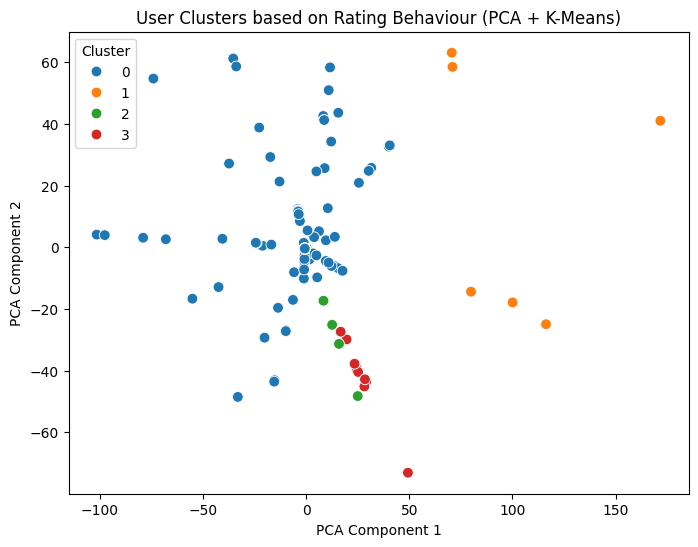

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Reduce to 2D for visualization
pca_2d = PCA(n_components=2, random_state=42)
user_2d = pca_2d.fit_transform(user_features)

plt.figure(figsize=(8,6))
sns.scatterplot(
    x=user_2d[:,0],
    y=user_2d[:,1],
    hue=user_clusters,
    palette="tab10",
    s=60
)

plt.title("User Clusters based on Rating Behaviour (PCA + K-Means)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Cluster")
plt.show()


#### User-Based Clustering (Based on Rating Behaviour)

Users are clustered based on their rating behaviour across products in order to
identify different preference patterns.

- Predicted user–item ratings are first standardized to ensure uniform scaling.

- PCA is applied to reduce dimensionality and remove noise from high-dimensional data.

- K-Means clustering is then used to group users into 4 distinct clusters.

- The number of clusters (k = 4) is selected as a balanced choice for meaningful segmentation.

- PCA-based 2D visualization helps in interpreting user clusters clearly.

Each point in the visualization represents a user, and different colors indicate
different clusters formed by K-Means.

- Cluster 0 represents the largest group of users with common rating patterns.

- Clusters 1, 2, and 3 represent smaller user groups with distinct or niche preferences.

- Clear separation between clusters indicates that users within a cluster share
  similar preferences compared to users in other clusters.


#

Elbow Method for User Clustering

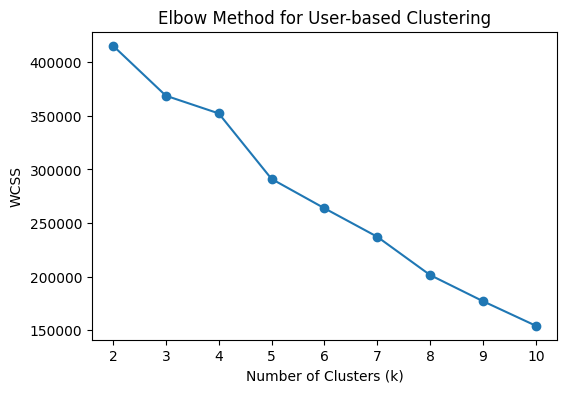

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

wcss = []
K = range(2, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(user_features)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(6,4))
plt.plot(K, wcss, marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("WCSS")
plt.title("Elbow Method for User-based Clustering")
plt.show()


#### Elbow Method for User-Based Clustering

The Elbow Method is used to determine the optimal number of clusters for
user-based clustering.

- WCSS (Within-Cluster Sum of Squares) decreases sharply from k = 2 to k = 4.

- After k = 4, the reduction in WCSS becomes gradual.

- This indicates diminishing returns beyond 4 clusters.

- Therefore, k = 4 is selected as a balanced and optimal choice for user clustering.


**USER DENDROGRAM - Hierarchical Clustering**

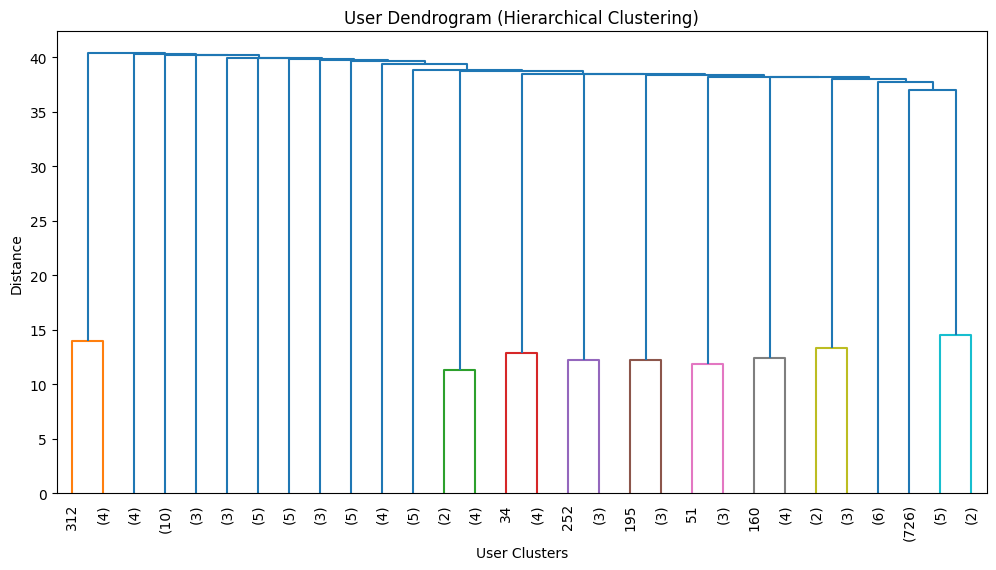

In [ ]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler

# USER LATENT FEATURES (from SVD)
# U matrix = user latent features
user_latent_features = U   # U from SVD

# Scale features
scaler = StandardScaler()
user_features_scaled = scaler.fit_transform(user_latent_features)

# Hierarchical clustering
linked_users = linkage(user_features_scaled, method='ward')

plt.figure(figsize=(12, 6))
dendrogram(
    linked_users,
    truncate_mode='lastp',
    p=30,
    leaf_rotation=90,
    leaf_font_size=10
)
plt.title("User Dendrogram (Hierarchical Clustering)")
plt.xlabel("User Clusters")
plt.ylabel("Distance")
plt.show()


#### User Dendrogram (Hierarchical Clustering)

Hierarchical clustering is applied on user latent features obtained from SVD
to validate the K-Means clustering results.

- The dendrogram shows four natural user clusters.
- This supports the choice of k = 4 obtained using the Elbow Method.
- Cluster 0 represents majority users with balanced rating behaviour.
- Cluster 1 contains users with consistent and selective preferences.
- Cluster 2 includes exploratory users with diverse rating patterns.
- Cluster 3 represents outlier users with unusual or extreme behaviour.

The dendrogram confirms that the user clusters formed are meaningful and well separated.


#

PRODUCT-BASED CLUSTERING

Instead of clustering products on raw sparse rating data, we use
latent features learned by the SVD model. These latent features capture
hidden product characteristics and provide a dense, meaningful
representation of products.

Product clusters are used during deployment to organize and structure
the recommended products.

In [ ]:
# Product latent features obtained from SVD
# Vt is obtained during SVD factorization

product_latent_features = Vt.T

product_latent_features.shape


(743, 20)

In [ ]:
from sklearn.cluster import KMeans

# Apply K-Means on product latent features
kmeans_product = KMeans(n_clusters=4, random_state=42)
product_clusters = kmeans_product.fit_predict(product_latent_features)

# Create product-cluster mapping
product_clusters_df = pd.DataFrame({
    "productid": user_item_matrix.columns,
    "product_cluster": product_clusters
})

product_clusters_df['product_cluster'].value_counts()


,count
product_cluster,
0,738
2,2
1,2
3,1


#### Product-based Clustering (Latent Space)

Products are clustered using latent features learned by the SVD model.
These features capture hidden similarities between products based on
user interactions.

The results show one dominant cluster and a few smaller clusters,
indicating common product behaviour with some niche products.

During deployment, product clusters are used to group and structure
the Top-N recommendations generated by SVD.

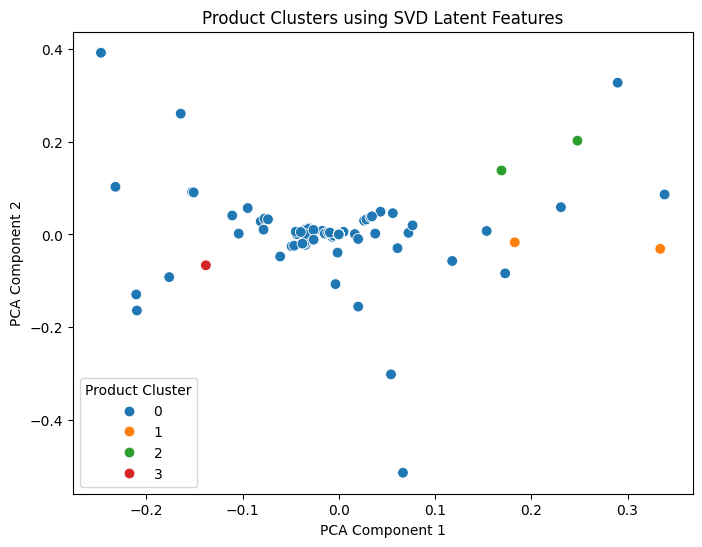

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

# Reduce product latent features to 2D for visualization
pca_2d = PCA(n_components=2, random_state=42)
product_2d = pca_2d.fit_transform(product_latent_features)

plt.figure(figsize=(8,6))
sns.scatterplot(
    x=product_2d[:,0],
    y=product_2d[:,1],
    hue=product_clusters,
    palette="tab10",
    s=60
)

plt.title("Product Clusters using SVD Latent Features")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Product Cluster")
plt.show()


#### Product Cluster Visualization (PCA + K-Means)

To visualize product clusters, PCA is applied to reduce the latent feature space
to two dimensions.

- Each point represents a product in the reduced feature space.

- Different colors indicate different product clusters.

- Most products form a dense cluster due to similar interaction patterns.

- A few products appear as niche items due to sparse user interactions.

The visualization provides clear insight into product grouping behaviour.

#

PRODUCT DENDROGRAM

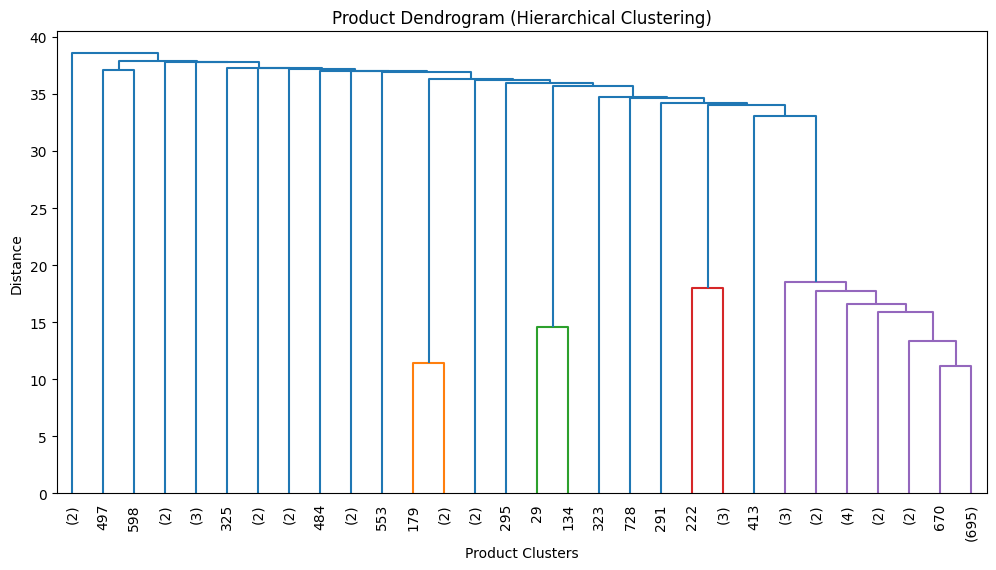

In [ ]:
# PRODUCT LATENT FEATURES (from SVD)
# Vt.T = product latent features
product_latent_features = Vt.T

# Scale features
product_features_scaled = scaler.fit_transform(product_latent_features)

# Hierarchical clustering
linked_products = linkage(product_features_scaled, method='ward')

plt.figure(figsize=(12, 6))
dendrogram(
    linked_products,
    truncate_mode='lastp',
    p=30,
    leaf_rotation=90,
    leaf_font_size=10
)
plt.title("Product Dendrogram (Hierarchical Clustering)")
plt.xlabel("Product Clusters")
plt.ylabel("Distance")
plt.show()


#### Product Dendrogram (Hierarchical Clustering)

Hierarchical clustering is applied on product latent features to validate
the K-Means clustering results.

- The dendrogram indicates four natural product clusters.

- This supports the selection of k = 4 for product-based clustering.

- Cluster 0 represents highly similar and popular products.

- Cluster 1 contains niche products preferred by specific user segments.

- Cluster 2 includes moderately related products with mixed rating patterns.

- Cluster 3 represents outlier or rarely rated products.

The dendrogram confirms that product clusters formed in latent space
are meaningful and well separated.


#

In [ ]:
from sklearn.metrics import silhouette_score

# Silhouette score for USER-based clustering
user_silhouette = silhouette_score(
    user_features,
    user_clusters
)

# Silhouette score for PRODUCT-based clustering (latent space)
product_silhouette = silhouette_score(
    product_latent_features,
    product_clusters
)

print("Silhouette Score (User Clustering):", round(user_silhouette, 4))
print("Silhouette Score (Product Clustering):", round(product_silhouette, 4))


Silhouette Score (User Clustering): 0.8477
Silhouette Score (Product Clustering): 0.9064


#### Clustering Evaluation using Silhouette Score

Silhouette Score is used to evaluate the quality of clustering by measuring
how well data points are grouped within clusters and separated from other clusters.

- User-based clustering achieved a silhouette score of 0.8477.

- This indicates strong cohesion within user clusters and good separation between them.

- Product-based clustering achieved a silhouette score of 0.9064.

- The high product silhouette score confirms meaningful grouping in the latent feature space.

- These results validate the effectiveness of K-Means clustering for both users and products.



#

## Deployment

In [ ]:
import joblib

# Save SVD matrices
joblib.dump(U, "user_latent_features.joblib")
joblib.dump(sigma, "sigma_matrix.joblib")
joblib.dump(Vt, "product_latent_features.joblib")

# Save metadata
joblib.dump(user_item_matrix, "user_item_matrix.joblib")

# Save clustering models
joblib.dump(kmeans_user, "kmeans_user_model.joblib")
joblib.dump(kmeans_product, "kmeans_product_model.joblib")

print("SVD matrices and clustering models saved successfully")


SVD matrices and clustering models saved successfully


#### Deployment –

The trained models and required components are saved using joblib
to support deployment and real-time inference.

- User latent features (U), singular value matrix (Σ), and product latent features (Vᵀ) are stored.

- The user–item interaction matrix is saved as supporting metadata.

- Saving these components avoids retraining the model during deployment.

- The saved models are later loaded in the Streamlit application for generating recommendations.

- This ensures faster response time and efficient deployment.
